<a href="https://colab.research.google.com/github/joan1011/Basic-Image-processing-steps-using-opencv-and-python/blob/master/opencv_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-thresholding/opencv-thresholding.zip
!unzip -qq opencv-thresholding.zip
%cd opencv-thresholding

--2021-05-28 13:24:00--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-thresholding/opencv-thresholding.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.144.25
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.144.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253456 (248K) [binary/octet-stream]
Saving to: ‘opencv-thresholding.zip’

opencv-thresholding 100%[===================>] 247.52K   957KB/s    in 0.3s    

2021-05-28 13:24:00 (957 KB/s) - ‘opencv-thresholding.zip’ saved [253456/253456]

/content/opencv-thresholding


## Blog Post Code

### Import Packages

In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Implementing simple thresholding with OpenCV

In [5]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/Eagle_coins.jpg"
}

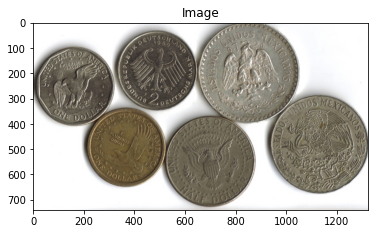

In [6]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

In [8]:
# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

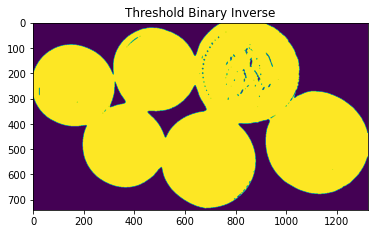

In [9]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this
# case, 200), we set it to be *black, otherwise it is *white*
(T, threshInv) = cv2.threshold(blurred, 200, 255,
	cv2.THRESH_BINARY_INV)
plt_imshow("Threshold Binary Inverse", threshInv)

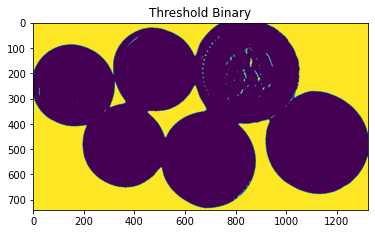

In [10]:
# using normal thresholding (rather than inverse thresholding)
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt_imshow("Threshold Binary", thresh)

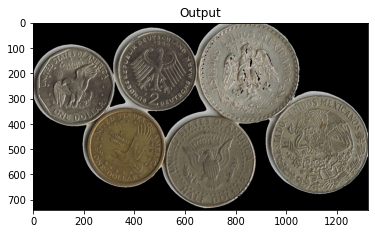

In [11]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)

### Implementing Otsu thresholding with OpenCV

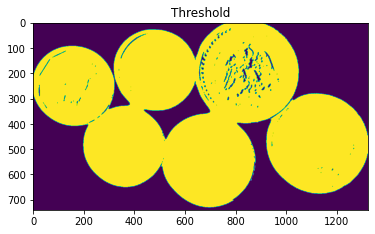

[INFO] otsu's thresholding value: 177.0


In [12]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Threshold", threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))

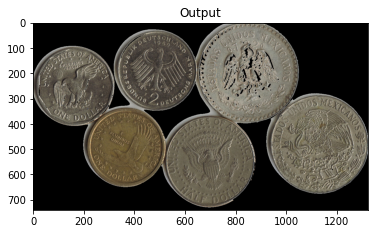

In [13]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)